In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)


# activation functions
# ReLu is very simple, it filters out all negative numbers
# this is a powerful activation function in reality
def activation_ReLu(number):
    if number > 0:
        return number
    else:
        return 0
    
# we also need a derived version of ReLu later
# otherwise the same than original, but instead of original value
# return 1 instead
def activation_ReLu_partial_derivative(number):
    if number > 0:
        return 1
    else:
        return 0

In [ ]:
def generate_train_data():
    result = []

    # create 100 numbers
    for x in range(100):
        n1 = np.random.randint(0, 5)
        n2 = np.random.randint(3, 7)
        n3 = n1 ** 2 + n2 + np.random.randint(0, 5)
        n3 = int(n3)

        # add the row to result
        result.append([n1, n2, n3])

    return result

In [3]:
# we'll start building our neural network training app here
# initialize weights and biases
# in Keras etc. these are usually randomized in the beginning
w1 = 1
w2 = 0.5
w3 = 1
w4 = -0.5
w5 = 1
w6 = 1
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# we'll save these for future
# se we can compare results to the final weights
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3
 
# learning rate and epochs
LR = 0.01
epochs = 1000

# our dataset, let's have a few more than one
# loosely follow the formula: x1 ^ 2 + x2 + 1
data = [
    [1, 0, 2],
    [2, 1, 6],
    [3, 3, 17]
]

data = generate_train_data()

# let's initialize a list for loss points
loss_points = []

# START THE TRAINING PROCESS
for epoch in range(epochs):
    for row in data:
        # for example with first row
        # [1, 0, 2] => assign input1 = 1, input2 = 0, true_value = 2
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]

        # FORWARD PASS

        # NODE 1 OUTPUT
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)

        # NODE 2 OUTPUT
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)

        # NODE 3 OUTPUT
        # we can just use Node 1 and 2 outputs, since they
        # already contain the the previous weights
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        # probably used later, we might want to have error metrics (MSE)
        predicted_value = node_3_output
        loss = (predicted_value - true_value) ** 2

        # BACKPROPAGATION - LAST LAYER FIRST
        # solve w5 and update the new value
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5

        # solve w6 and update the new value
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6

        # solve bias3 and update the new value
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # BACKPROPAGATION - THE FIRST LAYER
        # FROM THIS POINT FORWARD WE HAVE TO USE THE MORE COMPLEX VERSION
        # OF UPDATING THE VALUES -> CHAIN RULE

        # see the materials and the math experiment notebook for more details
        # start with weight 1
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        # weight 2
        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        # weight 3
        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        # weight 4
        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # bias 1
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        # bias 2
        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # ALL DONE! FINALLY UPDATE THE EXISTING WEIGHTS!
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    loss_points.append(loss)
    print(f"Epoch: {epoch +1}, loss {loss}")

Epoch: 1, loss 47.099487762620335
Epoch: 2, loss 25.397147288424918
Epoch: 3, loss 23.018372310372865
Epoch: 4, loss 22.711683294072945
Epoch: 5, loss 22.67116480900928
Epoch: 6, loss 22.665793982431616
Epoch: 7, loss 22.665081753581013
Epoch: 8, loss 22.664987298947644
Epoch: 9, loss 22.664974772430917
Epoch: 10, loss 22.664973111170035
Epoch: 11, loss 22.6649728908544
Epoch: 12, loss 22.664972861636226
Epoch: 13, loss 22.664972857761303
Epoch: 14, loss 22.66497285724743
Epoch: 15, loss 22.664972857179304
Epoch: 16, loss 22.664972857170255
Epoch: 17, loss 22.66497285716902
Epoch: 18, loss 22.66497285716892
Epoch: 19, loss 22.6649728571689
Epoch: 20, loss 22.6649728571689
Epoch: 21, loss 22.6649728571689
Epoch: 22, loss 22.6649728571689
Epoch: 23, loss 22.6649728571689
Epoch: 24, loss 22.6649728571689
Epoch: 25, loss 22.6649728571689
Epoch: 26, loss 22.6649728571689
Epoch: 27, loss 22.6649728571689
Epoch: 28, loss 22.6649728571689
Epoch: 29, loss 22.6649728571689
Epoch: 30, loss 22.664

In [4]:
print("ORIGINAL WEIGHTS AND BIASES")
print(f"w1: {original_w1}")
print(f"w2: {original_w2}")
print(f"w3: {original_w3}")
print(f"w4: {original_w4}")
print(f"w5: {original_w5}")
print(f"w6: {original_w6}")
print(f"b1: {original_b1}")
print(f"b2: {original_b2}")
print(f"b3: {original_b3}")

print("\n\n######################################")

print("NEW WEIGHTS AND BIASES")
print(f"w1: {w1}")
print(f"w2: {w2}")
print(f"w3: {w3}")
print(f"w4: {w4}")
print(f"w5: {w5}")
print(f"w6: {w6}")
print(f"b1: {bias1}")
print(f"b2: {bias2}")
print(f"b3: {bias3}")

ORIGINAL WEIGHTS AND BIASES
w1: 1
w2: 0.5
w3: 1
w4: -0.5
w5: 1
w6: 1
b1: 0.5
b2: 0
b3: 0.5


######################################
NEW WEIGHTS AND BIASES
w1: 2.5742598406171187
w2: 0.7594475720019436
w3: -9.922388722916562
w4: -1.9745198960782555
w5: -4.635691921455037
w6: -0.4284670480161607
b1: -1.2660194157412081
b2: -0.19998794074840648
b3: 12.334441091141919


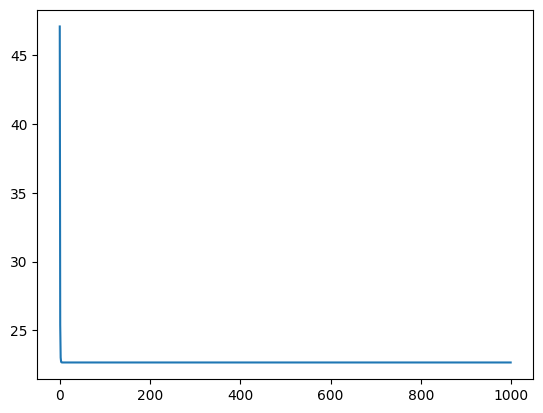

In [5]:
plt.plot(loss_points)
plt.show()

In [6]:
def predict(x1, x2):
    input1 = x1
    input2 = x2

    # FORWARD PASS

    # NODE 1 OUTPUT
    node_1_output = input1 * w1 + input2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)

    # NODE 2 OUTPUT
    node_2_output = input1 * w2 + input2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    # NODE 3 OUTPUT
    # we can just use Node 1 and 2 outputs, since they
    # already contain the the previous weights
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)

    return node_3_output

In [7]:
predict(3, 4)

12.334441091141919